## May Mon Thant
## Midterm Project Flight Delay Prediction
## Parami University
## Dr. Nwe Nwe Htay Win
## Introduction to Machine Learning
## December 7, 2025

##  Predicting Flight Delay

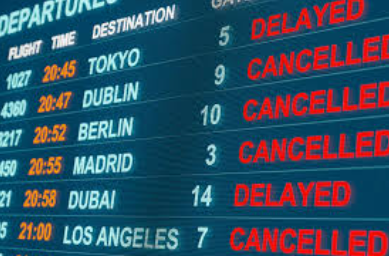

AIRLINE: Carrier code (e.g., AA, UA). We can learn more about this through airlines.csv

ORIGIN_AIRPORT: Departure airport code (can be found through airports.csv)

DESTINATION_AIRPORT: Arrival airport code (can be found through airports.csv)

TAXI_OUT: Time spent taxiing out (in minutes)

TAXI_IN: Time spent taxiing in (in minutes)

WHEELS_OFF: Time aircraft wheels left ground

WHEELS_ON: Time aircraft wheels touched ground

DEPARTURE_DELAY: Departure delay in minutes

ARRIVAL_DELAY: Arrival delay in minutes

AIR_SYSTEM_DELAY: Delay caused by air traffic control

SECURITY_DELAY: Delay caused by security issues

AIRLINE_DELAY: Delay caused by the airline

LATE_AIRCRAFT_DELAY: Delay caused by late arriving aircraft

WEATHER_DELAY: Delay caused by weather

DIVERTED: Binary indicator if flight was diverted

CANCELLED: Binary indicator if flight was cancelled

CANCELLATION_REASON: Reason for cancellation if applicable (mainly null)

In [81]:
import pandas as pd
import numpy as np


In [82]:
flight = pd.read_csv('flights.csv',  nrows=50000)

This dataset includes 5 million data so I only want to read around 50000.

In [83]:
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
flight.shape

(50000, 31)

In [85]:
flight.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

There are total 31 columns here. So, our target column is to check the flight will be delay or not which is arrival delay. So, I just count the important columns

In [86]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 50000 non-null  int64  
 1   MONTH                50000 non-null  int64  
 2   DAY                  50000 non-null  int64  
 3   DAY_OF_WEEK          50000 non-null  int64  
 4   AIRLINE              50000 non-null  object 
 5   FLIGHT_NUMBER        50000 non-null  int64  
 6   TAIL_NUMBER          49941 non-null  object 
 7   ORIGIN_AIRPORT       50000 non-null  object 
 8   DESTINATION_AIRPORT  50000 non-null  object 
 9   SCHEDULED_DEPARTURE  50000 non-null  int64  
 10  DEPARTURE_TIME       48896 non-null  float64
 11  DEPARTURE_DELAY      48896 non-null  float64
 12  TAXI_OUT             48873 non-null  float64
 13  WHEELS_OFF           48873 non-null  float64
 14  SCHEDULED_TIME       50000 non-null  int64  
 15  ELAPSED_TIME         48753 non-null 

In [87]:
flight.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               59
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1104
DEPARTURE_DELAY         1104
TAXI_OUT                1127
WHEELS_OFF              1127
SCHEDULED_TIME             0
ELAPSED_TIME            1247
AIR_TIME                1247
DISTANCE                   0
WHEELS_ON               1161
TAXI_IN                 1161
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1161
ARRIVAL_DELAY           1247
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48862
AIR_SYSTEM_DELAY       34592
SECURITY_DELAY         34592
AIRLINE_DELAY          34592
LATE_AIRCRAFT_DELAY    34592
WEATHER_DELAY          34592
dtype: int64

In [88]:
flight['ARRIVAL_DELAY'].value_counts()

ARRIVAL_DELAY
-6.0      1212
-5.0      1157
-8.0      1140
-2.0      1124
-3.0      1112
          ... 
 371.0       1
 253.0       1
 908.0       1
 250.0       1
 259.0       1
Name: count, Length: 423, dtype: int64

In [89]:
flight['DATE'] = pd.to_datetime(flight[['YEAR', 'MONTH', 'DAY']])

total_flights = len(flight)
cancelled_flights = flight['CANCELLED'].sum()
diverted_flights = flight['DIVERTED'].sum()
on_time_flights = len(flight[(flight['DEPARTURE_DELAY'] <= 0) & (flight['CANCELLED'] == 0)])

print(f"Total Flights: {total_flights:,}")
print(f"Cancelled Flights: {cancelled_flights:,} ({cancelled_flights/total_flights*100:.2f}%)")
print(f"Diverted Flights: {diverted_flights:,} ({diverted_flights/total_flights*100:.2f}%)")
print(f"On-time Flights: {on_time_flights:,} ({on_time_flights/total_flights*100:.2f}%)")

Total Flights: 50,000
Cancelled Flights: 1,138 (2.28%)
Diverted Flights: 109 (0.22%)
On-time Flights: 23,696 (47.39%)


In [90]:
missing_arrival_delay_df = flight[flight['ARRIVAL_DELAY'].isna()]
print(missing_arrival_delay_df[['CANCELLED','DIVERTED']].value_counts())

CANCELLED  DIVERTED
1          0           1138
0          1            109
Name: count, dtype: int64


In [91]:
flight = flight[(flight['ARRIVAL_DELAY'].notna()) & 
                (flight['CANCELLED'] == 0) & 
                (flight['DIVERTED'] == 0)]


Then I have filtered the flights which is not CANCELLED or not DIVERTED. Only Arrial Delay

In [92]:
total_flights = len(flight)
missing_arrival_delay = flight['ARRIVAL_DELAY'].isna().sum()
missing_percentage = (missing_arrival_delay / total_flights) * 100

print(f"Total flights: {total_flights:,}")
print(f"Missing ARRIVAL_DELAY: {missing_arrival_delay:,} ({missing_percentage:.2f}%)")


Total flights: 48,753
Missing ARRIVAL_DELAY: 0 (0.00%)


In [93]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48753 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   YEAR                 48753 non-null  int64         
 1   MONTH                48753 non-null  int64         
 2   DAY                  48753 non-null  int64         
 3   DAY_OF_WEEK          48753 non-null  int64         
 4   AIRLINE              48753 non-null  object        
 5   FLIGHT_NUMBER        48753 non-null  int64         
 6   TAIL_NUMBER          48753 non-null  object        
 7   ORIGIN_AIRPORT       48753 non-null  object        
 8   DESTINATION_AIRPORT  48753 non-null  object        
 9   SCHEDULED_DEPARTURE  48753 non-null  int64         
 10  DEPARTURE_TIME       48753 non-null  float64       
 11  DEPARTURE_DELAY      48753 non-null  float64       
 12  TAXI_OUT             48753 non-null  float64       
 13  WHEELS_OFF           48753 non-null 

In [94]:
flight.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER                0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME             0
DEPARTURE_DELAY            0
TAXI_OUT                   0
WHEELS_OFF                 0
SCHEDULED_TIME             0
ELAPSED_TIME               0
AIR_TIME                   0
DISTANCE                   0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME               0
ARRIVAL_DELAY              0
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    48753
AIR_SYSTEM_DELAY       33345
SECURITY_DELAY         33345
AIRLINE_DELAY          33345
LATE_AIRCRAFT_DELAY    33345
WEATHER_DELAY          33345
DATE                       0
dtype: int64

After that I have full dataset again, with the exact arrival delay

## Feature Extraction and Feature Engineering

In [95]:
selected_columns = ['MONTH', 'DAY', 'DAY_OF_WEEK', 
                    'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME',
                    'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE']

features_df = flight[selected_columns]

In [96]:
features_df.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE
0,1,1,4,5,430,205,AS,ANC,SEA,1448
1,1,1,4,10,750,280,AA,LAX,PBI,2330
2,1,1,4,20,806,286,US,SFO,CLT,2296
3,1,1,4,20,805,285,AA,LAX,MIA,2342
4,1,1,4,25,320,235,AS,SEA,ANC,1448


In [97]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48753 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MONTH                48753 non-null  int64 
 1   DAY                  48753 non-null  int64 
 2   DAY_OF_WEEK          48753 non-null  int64 
 3   SCHEDULED_DEPARTURE  48753 non-null  int64 
 4   SCHEDULED_ARRIVAL    48753 non-null  int64 
 5   SCHEDULED_TIME       48753 non-null  int64 
 6   AIRLINE              48753 non-null  object
 7   ORIGIN_AIRPORT       48753 non-null  object
 8   DESTINATION_AIRPORT  48753 non-null  object
 9   DISTANCE             48753 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 4.1+ MB


In my selected df, there is no null values

To detect arrival delay, there are also some important features that we need to add, which are time, hour, rush hour like that. SO, based on the given dataset, I just created new features with some mathematical equations.

In [98]:

# flight['hour_of_day'] = flight['SCHEDULED_DEPARTURE'] // 100


# flight['is_morning_rush'] = flight['hour_of_day'].isin([6, 7, 8]).astype(int)
# flight['is_evening_rush'] = flight['hour_of_day'].isin([17, 18, 19]).astype(int)
# flight['is_night_flight'] = flight['hour_of_day'].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)

# flight['is_weekend'] = flight['DAY_OF_WEEK'].isin([6, 7]).astype(int)


# flight['winter_month'] = flight['MONTH'].isin([12, 1, 2]).astype(int)
# flight['summer_month'] = flight['MONTH'].isin([6, 7, 8]).astype(int)
# flight['holiday_season'] = flight['MONTH'].isin([11, 12]).astype(int)

# flight['is_short_flight'] = (flight['DISTANCE'] < 500).astype(int)
# flight['is_long_flight'] = (flight['DISTANCE'] > 2000).astype(int)

I tried with adding subgrouping features but the results are the same so that's why I remove that.

In [99]:
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [100]:
categorical_features = ['ORIGIN_AIRPORT', 'AIRLINE', 'DESTINATION_AIRPORT'] 

I have separated categorical_features and numercial features to insert into the pipeline.

In [101]:
from sklearn.pipeline import Pipeline

for categorical column, as it has no order we will use one hot encoder.

In [102]:

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(
        handle_unknown= 'ignore',  
        sparse_output=False,      
        drop=None                
    ))                                    
])

In [104]:
numerical_features = [
    'MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 
    'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DISTANCE'
]

for numerical columns, we are going to use the scaler.

In [105]:
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())                    
])

In [106]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' 
)

In [107]:
final_columns = categorical_features + numerical_features + ['ARRIVAL_DELAY']
df_preprocessed = pd.DataFrame(features_df, columns = final_columns)
df_preprocessed.head()

,ORIGIN_AIRPORT,AIRLINE,DESTINATION_AIRPORT,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY
0,ANC,AS,SEA,1,1,4,5,430,205,1448,NaN
1,LAX,AA,PBI,1,1,4,10,750,280,2330,NaN
2,SFO,US,CLT,1,1,4,20,806,286,2296,NaN
3,LAX,AA,MIA,1,1,4,20,805,285,2342,NaN
4,SEA,AS,ANC,1,1,4,25,320,235,1448,NaN


We regard that if a flight is delay by more than 15 minutes, that can be a delayed flight.

In [108]:
y = (flight['ARRIVAL_DELAY'] > 15).astype(int)
X = flight[categorical_features + numerical_features]


In [109]:
label_counts = y.value_counts()
print("Label distribution:")
print(label_counts)


Label distribution:
ARRIVAL_DELAY
0    33882
1    14871
Name: count, dtype: int64


In [110]:
label_percentage = y.value_counts(normalize=True) * 100
print("\nPercentage of each class:")
print(label_percentage)


Percentage of each class:
ARRIVAL_DELAY
0    69.497262
1    30.502738
Name: proportion, dtype: float64


We  can see the class imbalance there.

In [111]:
y_named = y.replace({0: 'Not Delayed', 1: 'Delayed'})
print("\nSample of renamed labels:")
print(y_named.head())


Sample of renamed labels:
0    Not Delayed
1    Not Delayed
2    Not Delayed
3    Not Delayed
4    Not Delayed
Name: ARRIVAL_DELAY, dtype: object


if the delay is greater than 15 minutes we accept it as a delay = 1 ,
if there is no delay or less than 15 minutes than delay = 0

In [112]:
print(y_named.value_counts())

ARRIVAL_DELAY
Not Delayed    33882
Delayed        14871
Name: count, dtype: int64


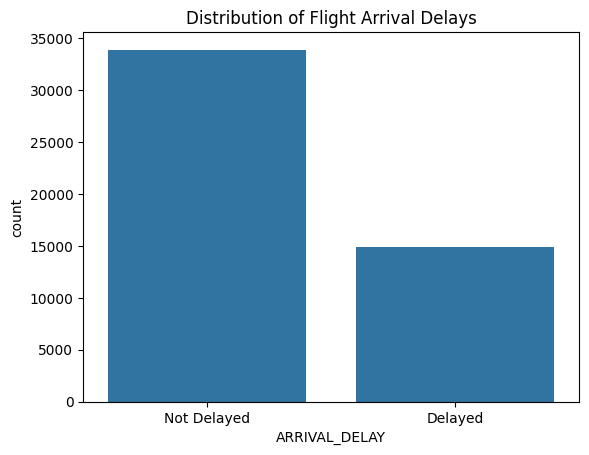

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_named)
plt.title("Distribution of Flight Arrival Delays")
plt.show()


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train.shape,y_train.shape

((39002, 10), (39002,))

In [116]:
X_train["DESTINATION_AIRPORT"].value_counts()

DESTINATION_AIRPORT
ATL    2378
ORD    1928
DFW    1874
DEN    1578
LAX    1533
       ... 
ADQ       2
HYS       1
ADK       1
OTH       1
PPG       1
Name: count, Length: 310, dtype: int64

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39002 entries, 44419 to 16311
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ORIGIN_AIRPORT       39002 non-null  object
 1   AIRLINE              39002 non-null  object
 2   DESTINATION_AIRPORT  39002 non-null  object
 3   MONTH                39002 non-null  int64 
 4   DAY                  39002 non-null  int64 
 5   DAY_OF_WEEK          39002 non-null  int64 
 6   SCHEDULED_DEPARTURE  39002 non-null  int64 
 7   SCHEDULED_ARRIVAL    39002 non-null  int64 
 8   SCHEDULED_TIME       39002 non-null  int64 
 9   DISTANCE             39002 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.3+ MB


In [118]:
y_train.head()

44419    0
33751    0
3497     0
9047     0
19368    0
Name: ARRIVAL_DELAY, dtype: int64

In [119]:
X_train.head()

,ORIGIN_AIRPORT,AIRLINE,DESTINATION_AIRPORT,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE
44419,TPA,WN,PVD,1,3,6,1955,2235,160,1136
33751,LAX,DL,HNL,1,3,6,830,1228,358,2556
3497,ORD,AA,PBI,1,1,4,1010,1400,170,1144
9047,LAX,UA,ORD,1,1,4,1602,2203,241,1744
19368,SLC,F9,DEN,1,2,5,1034,1155,81,391


In [120]:
X_train.isnull().sum()

ORIGIN_AIRPORT         0
AIRLINE                0
DESTINATION_AIRPORT    0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
SCHEDULED_DEPARTURE    0
SCHEDULED_ARRIVAL      0
SCHEDULED_TIME         0
DISTANCE               0
dtype: int64

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

So, for model training process, I have tried with
- Logistic regression
- KNN Classifier
- Adding PCA
- SMOTE
- Random Forest 
- SMOTE + Random Forest

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ))  
])




In [123]:
log_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [124]:



y_pred_logreg = log_model.predict(X_test)



In [125]:
print("Logistic Regression Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Results
Confusion Matrix:
 [[4694 2091]
 [ 946 2020]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.76      6785
           1       0.49      0.68      0.57      2966

    accuracy                           0.69      9751
   macro avg       0.66      0.69      0.66      9751
weighted avg       0.73      0.69      0.70      9751

Accuracy: 0.6885447646395242


## KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))   #tried with 3,5,9 but the result seems similar
])

In [128]:
knn_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [129]:
y_pred_knn = knn_model.predict(X_test)

In [130]:
print("KNN Classifier Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Classifier Results
Confusion Matrix:
 [[5909  876]
 [1525 1441]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      6785
           1       0.62      0.49      0.55      2966

    accuracy                           0.75      9751
   macro avg       0.71      0.68      0.69      9751
weighted avg       0.74      0.75      0.74      9751

Accuracy: 0.7537688442211056


##  PCA with Logistic Regression

In [131]:
from sklearn.decomposition import PCA


logreg_pca_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10, random_state=42)),  # tried with n_component 5 and 10 but the result is same accuracy and recall
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ))  
])






In [132]:
logreg_pca_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [133]:
y_pred_logreg_pca = logreg_pca_model.predict(X_test)

In [134]:
print("Logression Regression PCA Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_pca))

Logression Regression PCA Results
Confusion Matrix:
 [[4308 2477]
 [ 981 1985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71      6785
           1       0.44      0.67      0.53      2966

    accuracy                           0.65      9751
   macro avg       0.63      0.65      0.62      9751
weighted avg       0.70      0.65      0.66      9751

Accuracy: 0.6453697056712132


## PCA with KNN

In [135]:
knn_pca_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95, random_state=42)),  
    ('classifier', KNeighborsClassifier(n_neighbors=5))  
])







In [136]:
knn_pca_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [137]:
y_pred_knn_pca = knn_pca_model.predict(X_test)

In [138]:
print("KNN with PCA Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_pca))

KNN with PCA Results
Confusion Matrix:
 [[5874  911]
 [1605 1361]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.82      6785
           1       0.60      0.46      0.52      2966

    accuracy                           0.74      9751
   macro avg       0.69      0.66      0.67      9751
weighted avg       0.73      0.74      0.73      9751

Accuracy: 0.741975182032612


## SMOTE + Random Forest

In [139]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200, class_weight='balanced') #if we tuned the estimators to 100 the result the accuracy changed to lower one
) # then change estimators 300 and min_samples leaf to 10 also results in lower recall. that's why I kept this as 200. 
])

In [142]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
y_pred = model.predict(X_test)

In [144]:
# this model

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[5123 1662]
 [1060 1906]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      6785
           1       0.53      0.64      0.58      2966

    accuracy                           0.72      9751
   macro avg       0.68      0.70      0.69      9751
weighted avg       0.74      0.72      0.73      9751

Accuracy: 0.7208491436775716


In [145]:
rf = model.named_steps['classifier']
rf_importances = rf.feature_importances_


In [146]:
num_features = numerical_features

In [147]:
ohe = model.named_steps['preprocessor'] \
            .named_transformers_['cat'] \
            .named_steps['onehot']

cat_features = ohe.get_feature_names_out(categorical_features)

In [148]:
feature_names = np.concatenate([num_features, cat_features])


In [149]:
importances = rf.feature_importances_

In [150]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [151]:
feature_importance_df.head()

,feature,importance
3,SCHEDULED_DEPARTURE,0.126597
4,SCHEDULED_ARRIVAL,0.108432
2,DAY_OF_WEEK,0.108237
1,DAY,0.102599
319,AIRLINE_DL,0.058239


After testing Logistic Regression, KNN, PCA-based models, and Random Forest can be the best model for predicting flight delays .The main issue in the dataset was class imbalance: there are many more on-time flights than delayed ones. 

KNN - overall accuracy (74.8%), but it performed very poorly in recalling delayed flights (only 48%). 
This means it missed more than half of all actual delays, which is not acceptable since the goal is to detect delays.

For Logistic Regression (with and without PCA) had recall (68–69%) than KNN, but its precision was low (48–49%). 
This caused many false alarms—over 2,000 not delay flights were incorrectly predicted as delayed.
If we make a business this cause our customers losing trust in our system.

SMOTE + Random Rorest has 72.4% accuracy, 54% precision, and 63% recall for delayed flights.
 This means the model correctly predicts most delayed flights. It also had the lowest number of missed delays and fewer false positives compared to other models. The F1-score of 0.58 is a good balance between precision and recall among other models.

That's why I finally chose SMOTE + Random forest as the final model.

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cof_matrix=confusion_matrix(y_pred,y_test)
cm = cof_matrix.ravel()
tp = cm[0]
fp = cm[1]
fn = cm[2]
tn = cm[3]
print('True Positive :', tp)
print('False Positive :', fp)
print('False Negative :', fp)
print('True Negative :', tn)

True Positive : 5123
False Positive : 1060
False Negative : 1060
True Negative : 1906


In [153]:
import pickle
with open('flight_delay3.pkl', 'wb') as f:
    pickle.dump(model,f)

In [154]:
# reload
with open('flight_delay3.pkl','rb') as f:
    loaded_model = pickle.load(f)
loaded_model

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [155]:
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [156]:
X_train.head()

,ORIGIN_AIRPORT,AIRLINE,DESTINATION_AIRPORT,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE
44419,TPA,WN,PVD,1,3,6,1955,2235,160,1136
33751,LAX,DL,HNL,1,3,6,830,1228,358,2556
3497,ORD,AA,PBI,1,1,4,1010,1400,170,1144
9047,LAX,UA,ORD,1,1,4,1602,2203,241,1744
19368,SLC,F9,DEN,1,2,5,1034,1155,81,391


In [157]:
X_train.columns

Index(['ORIGIN_AIRPORT', 'AIRLINE', 'DESTINATION_AIRPORT', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
       'SCHEDULED_TIME', 'DISTANCE'],
      dtype='object')

In [158]:
X_train['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL    2284
ORD    1845
DFW    1791
LAX    1522
DEN    1464
       ... 
ADQ       2
PUB       2
ROW       1
ADK       1
OTH       1
Name: count, Length: 309, dtype: int64

In [159]:
X_test.head()

,ORIGIN_AIRPORT,AIRLINE,DESTINATION_AIRPORT,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE
6636,CLE,EV,BOS,1,1,4,1330,1518,108,563
16840,SBN,OO,ATL,1,2,5,805,1013,128,566
37263,MDW,WN,SAN,1,3,6,1210,1435,265,1728
27882,CMH,EV,ORD,1,2,5,1859,1920,81,296
27580,HOU,WN,IND,1,2,5,1840,2150,130,861


In [160]:
loaded_model

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
